# Mount Notebook to Google Drive

### Note: Incase if the images code throws an error disconnect and delete runtime and rerun the mounting code and the images code. We are using some images as references and for elaboration in our discussion. cv2.imshow() provided in the template was giving errors and we had to use cv2_imshow as recommended [here](https://stackoverflow.com/questions/55288657/image-is-not-displaying-in-google-colab-while-using-imshow).


This is the link to our video presentation:
<a href='https://drive.google.com/file/d/1332XCoeGegvXfFryiUQxugt-93Azowh_/view?usp=sharing
'> Video Presentation </a>

This is the link to our presentation slides:
<a href="https://docs.google.com/presentation/d/17Ld-u2Jra335gSOjr3bvn4aI_Zi-TmU8d6JZu9KJzss/edi
t?usp=sharing">
Slides
</a>



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Changing to relevant Directories
%cd '/content/drive/MyDrive/BD4h_project_draft/code/'
%pwd

Mounted at /content/drive
/content/drive/MyDrive/BD4h_project_draft/code


'/content/drive/MyDrive/BD4h_project_draft/code'

# Introduction


#### **Team Members: Syed Bilal Hoda and Syed Mehlial Hassan Kazmi**
#### **Paper Details:**

Index: 68

Title: Attend and diagnose: clinical time series analysis using attention models

Venue: AAAI

Author(s): Huan Song, Deepta Rajan, Jayaraman J. Thiagarajan, Andreas Spanias

#### **Background:**

The adoption of electronic health records has led to an increasing demand for predictive models that are capable of effectively analyzing clinical time-series data. Deep neural networks, that employ Recurrent Neural Network (RNN) architectures with Long Short-Term Memory (LSTM) units, have achieved notable success in various clinical prediction tasks. However, the sequential nature of Recurrent Neural Networks presents obstacles to parallelized computing, resulting in inefficiencies specifically when dealing with long sequences.

#### **Paper Explanation:**

This paper introduces a new method for dealing with clinical time series data that is based on masked, self attention mechanisms and uses positional encoding and dense interpolation strategies for incorporating temporal order.

Attention models historically have shown great success in transduction tasks in NLP while showing computationally superior performance. The paper uses MIMIC-III datasets, to demonstrate that the proposed methodology achieves state of the art performance on various tasks which include in hospital mortality, decompensation, phenotyping, length of stay, out performing LSTM models and classical baseline models such as logistic regression, for both single task and multi-task strategies.

The architecture for our attention mechanism is as follows:



*   First step includes to create input embeddings with 1d convolution layer and to create positional encodings for each time step. Latter is added to the former.
*    Next step is to use masked self attention. Attention is based on $\text{SOFTMAX}\left(\frac{QK^T}{\sqrt{d}}\right)V$. Then it performs the dense interpolation for encoding order.
*   After obtaining a single vector representation, we utilize a linear layer to obtain the logits. In this methodology regularization performs an important role.


The advantages of using this approach are:


*   Memory: Attention mechanisms will enable us to understand the amount of memory modeling needed in benchmark tasks for medical data.
*   Optimization: The mathematical simplicity of attention models will enable the use of additional constraints.
* Computation: Attention models are fully parallelizable.

The proposed model shows better convergence, higher AUROC, higher AURPC and lower MAPE for different tasks in most cases when compared with LSTM and the baseline model.
The paper also highlights the impact of the choice of number of attention layers N, the dense interpolation factor M, and the mask size of the self-attention mechanism r on the test performances for each of the task and shows what set of optimal parameters give the best performance.

As per the authors utilization of attention for clinical modelling is a novel approach that has been utilized for the first time for clinical prediction tasks and they suggest it could pave the way for exploring new directions in healthcare analytics.



# Scope of Reproducibility:



#### **Hypothesis**



Attention based sequence modeling architecture provide state of the art performance by dispensing recurrence entirely for multivariate time-series data in different clinical diagnosis tasks, compared to LSTMs and baseline models. We will validate that attention models do perform well over clinical tasks and give comparable results to the ones shared in the paper. We will run the model for the following single tasks:


*   In hospital mortality
*   Decompensation
*   Length of Stay
*   Phenotyping


Note: The task descriptions are provided in the methodology section. For the sake of this project we won't implement the model for multi-task since our paper relies on another paper for data processing. Secondly, our paper just provides the model architecture and doesn't provide any implementation of the model for the particular tasks. The data generated from the processing and pipeline for each of the tasks listed above needs to be amended further in such a manner that it could be used by our attention models.

Similarly, for multi-task changes need to be made to the data generated from the data pipeline and processing steps in order to run the attention model and given the short timeline for the project and limited details in our primary paper as well as the secondary paper on multi-task learning and joint inferencing it makes replication difficult. Hence we have decided to not include it in our project.



# Methodology

##  **Data**

We utilize the MIMIC III Dataset, which is accessible [here](https://physionet.org/content/mimiciii/1.4/).  The associated source code for the paper lacks any provision for data processing or details on data structuring. Instead, for data processing, it references another paper available [here](https://arxiv.org/pdf/1703.07771.pdf). This paper addresses the same clinical prediction tasks as in our paper and employs models such as Logistic Regression and LSTM for prediction, whose results are used as benchmarks in our paper.



#### **Data Description and Data Processing Pipeline details:**

##### **Overview:**

The MIMIC-III dataset contains deidentified information about patients admitted to critical care units (spanning from 2001 to 2012). It contains data on diagnostic codes, survival/mortality rates and other patient related info. As described in the paper, we used the cohort of 33,798 unique patients encompassing 42,276 hospital admissions and ICU stays.

Each patient’s data is divided into separate episodes containing both time series of events, and episode level outcomes. The time series measurements are then transformed into a 76-dimensional vector at each time step. The size of the benchmark dataset for each task is highlighted in Table 1.

| Table 1: Task-specific sample sizes of MIMIC-III dataset. |     |      |      |
|---------------|-----|------|------|
| Benchmark                                                | Train      | Validation  | Test    |
|----------------|------------|-------------|---------|
| Mortality                                               | 14,659     | 3,244   | 3,236  |
| Decompensation                                          |2,396,001   | 512,413     | 523,208   |
| Length of Stay                                          | 2,392,950      | 532,484    | 525,912   |
| Phenotyping                                             | 29,152 | 6,469 | 6,469  

For our attention model we utilize the same data processing pipeline as in the secondary paper. The pipeline generates csv files on top of which we do further processing and generate ouputs in a format suitable to be consumed by our model pipeline.

To generate data from the data processing pipeline we run some python scripts locally on our system using bash commands as described [here](https://github.com/YerevaNN/mimic3-benchmarks/blob/master/README.md) to generate new csv files. The summary of the processing steps and some basic description of the important data used from MIMIC III is as follows:


##### **Data Description:**

1. **Patients data**

  Contains details such as patient ID, Date of Birth, Date of Death [if the patient died], Expiry flag.

2. **Admissions data**

Contains information regarding when the patient was admitted into the hospital, information on time of death and other admission specific details. Each patient can have one or more hospital admissions.

3. **ICU stays and transfers data**

ICU stays data (also referred to as episodes) contains information on when the patient was admitted into ICU and when he left along with the information on ward etc. Within a single admission, a patient may have one or more ICU stays.

The ICU transfers data has the information on the transfers between wards in an ICU. For each patient and ICU stay it specifies the current ward and previous ward along with the in and out time.

4. **Diagnoses events**

Contains icd 9 code diagnoses for each patient and event id.

5. **Chart and lab events**

From chart and lab events we construct our feature set. The dataset contains event time and value for each patient.

| Table 2: Showing 17 variables that we will use along with the source table name from MIMIC and data type. |     |      |
|---------------|-----|------|
| Variable                         | MIMIC-III Table | Data Type    |
|----------------------------------|-----------------|---------------|
| Capillary refill rate            | chartevents     | Categorical   |
| Diastolic blood pressure         | chartevents     | Continuous    |
| Fraction inspired oxygen         | chartevents     | Continuous    |
| Glascow coma scale eye opening   | chartevents     | Categorical   |
| Glascow coma scale motor response| chartevents     | Categorical   |
| Glascow coma scale total         | chartevents     | Categorical   |
| Glascow coma scale verbal response| chartevents     | Categorical   |
| Glucose                          | chartevents, labevents | Continuous |
| Heart Rate                       | chartevents     | Continuous    |
| Height                           | chartevents     | Continuous    |
| Mean blood pressure              | chartevents     | Continuous    |
| Oxygen saturation                | chartevents, labevents | Continuous |
| Respiratory rate                 | chartevents     | Continuous    |
| Systolic blood pressure          | chartevents     | Continuous    |
| Temperature                      | chartevents     | Continuous    |
| Weight                           | chartevents     | Continuous    |
| pH                               | chartevents, labevents | Continuous |


##### **Processing Steps:**

When we run the python scripts using bash the following processing takes place:

1. The processing begins with the complete MIMIC-III critical care database, encompassing more than 60,000 ICU stays among 40,000 critical care patients. Initially, in the first step we run the "extract_subjects.py", relevant data are extracted from the raw MIMIC-III tables and organized by patient.

2. An exclusion criteria is applied to admissions and ICU stays. This involves excluding hospital admissions with multiple ICU stays or transfers between different ICU units or wards to minimize ambiguity regarding outcomes.

3. Additionally, ICU stays involving patients under 18 are excluded due to significant physiological differences between adults and pediatric cases. As a result, a root cohort comprising 33,798 unique patients with a total of 42,276 ICU stays and over 250 million clinical events is created.

4. Next the clinical events are processed. The "validate_events.py" step filters out 45 million events that cannot be reliably matched to an ICU stay in our cohort. This involves several filtering criteria, such as the presence of admission IDs (HADM_ID) and ICU stay IDs (ICUSTAY_ID).

5. The "extract_episodes_from_subjects.py" step compiles a time series of events for each episode, retaining only variables from a predefined list and conducting further cleaning. 17 physiological variables are utilized representing a subset from the Physionet/CinC Challenge 2012, with values compiled from multiple MIMIC-III variables.

6. In the "split_train_and_test.py" step, a test set comprising 15% (5,070) of patients, including 6,328 ICU stays and 4.7 million events, is established.

7. Finally, task-specific datasets (csv files) are prepared in separate folders.

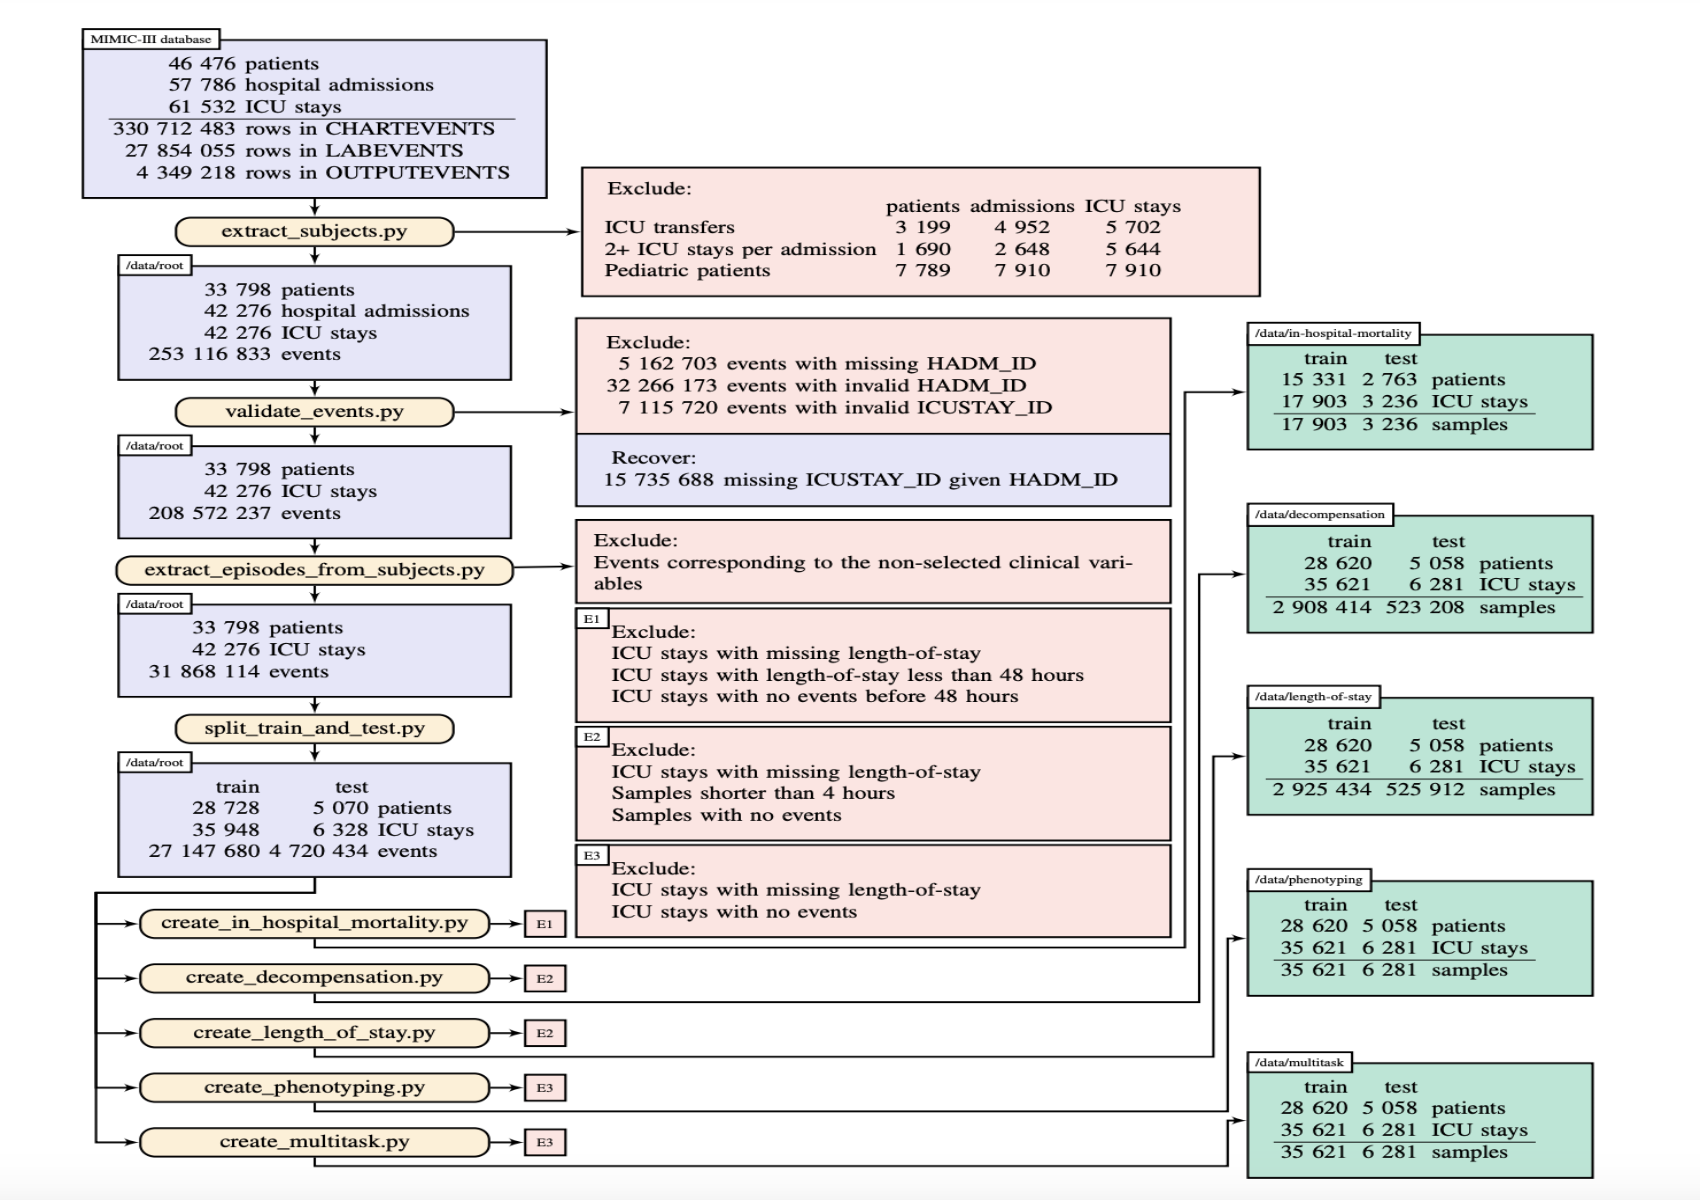

In [ ]:
# @title
# no code is required for this section
'''
if you want to use an image outside this notebook for explanaition,
you can upload it to your google drive and show it with OpenCV or matplotlib
'''
# mount this notebook to your google drive
# drive.mount('/content/gdrive')
# from google.colab.patches import cv2_imshow


# import  packages you need
import numpy as np
from google.colab import drive


# define dirs to workspace and data
img_dir = '/content/drive/MyDrive/BD4h_project_draft/Images/Data_Processing.jpg'

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(img_dir)

# Define the desired width and height
new_width = 1700  # Adjust as needed
new_height = 1200  # Adjust as needed

# Resize the image
resized_img = cv2.resize(img, (new_width, new_height))

# Display the resized image
cv2_imshow(resized_img)



**Figure 1: Referenced from the supplementary paper, illustrates the various processing stages and provides a depiction of the final data composition for each task. It's important to note that this data is what will be contained within the generated CSV files and will undergo additional processing which we do on our own to make this data usable for the attention models.**

#### **Task Descriptions and Further Data Processing for Tasks:**

For each of the tasks we further structure and process our data in such a way that it represents the problem formulation in the task and can be fed into the model to achieve the goal. The details of the tasks along with how we structure the data on the generated csvs (csvs which were generated through the data processing pipelines) is given below:

##### **Tasks:**

1. **In Hospital Mortality:**

This is a binary classification task. In-hospital mortality is predicted based on the first 24 hours of an ICU stay. True mortality labels are specified by comparing date of death with hospital admission and discharge times.
The benchmark cohort has only 13% of mortality rate.

2. **Decompensation:**

An important factor impacting treatment strategies during hospitalisation is the decline in organ function. The process of physiological decompensation involves predicting whether a patient will die within the next 24 hours by consistently monitoring them within set time intervals. Consequently, the dataset for this task requires predictions at each time step.
We formulate this decompensation task as a binary classification problem, in which the target label indicates whether the patient dies within the next 24 hours. Approximately 4.2% of samples are identified as positive in the dataset.

3. **Length of Stay:**

Predicting the duration of a patient's hospital stay holds significance in healthcare management. This prediction entails examining events within a fixed time window, with assessments made hourly from the moment of admission. As part of the benchmarking process, the remaining length of stay is provided for each patient on an hourly basis. These true range of values are then transformed into ten groups to frame it as a classification problem. Specifically, there's a group for stays less than a day, followed by seven one-day-long groups representing each day of the first week, and two additional groups for outliers one for stays exceeding a week but less than two weeks, and another one for stays greater than two weeks.


4. **Phenotyping:**

With the knowledge of a patient's ICU stay, it becomes possible to predict the probable disease conditions retrospectively. This process is known as acute care phenotyping. The benchmark dataset, consists of 25 disease conditions. Among these, 12 are critical, including respiratory or renal failure, while 8 are chronic ailments such as diabetes and atherosclerosis. Additionally, there are 5 conditions classified as 'mixed', such as liver infections. As patients are often diagnosed with multiple conditions simultaneously, this scenario can be framed as a multi-label classification problem.


##### **Further Processing Steps:**

For each task then we create separate loading functions where we then first apply discretization, normalization and pad zeros as needed and then convert the input to tensors. We pad zeros for all tasks except for In hospital mortality. The reason being is for In hospital mortality the time window for each patient is same where as for rest of the tasks the time window can vary. The reason being for rest of the tasks the patient's stay, time of entry and exit can vary where as for in hospital mortality we predict mortality for every patinet based on the 24 hours time window.

#### **Additional Notes**

* For the final delivery of the project we have used demo data from MIMIC because of computational constraints. On colab we couldn't run the code on full data as we kept running out of memory. We even purchased colab pro but even then the computational resources weren't sufficient. We also tried different subsets of the full data but even those subsets ran into the same issue. Hence we ran the data processing pipeline on demo data to generate csvs. This demo data consists of a very small subset (roughly 100 unique patients) of the whole MIMIC III data.

* For each the task the further processing steps of the CSVs may slightly vary. Hence for each task we create a separate loading function to convert the input to tensors.

* We also don't implement the baseline models since our paper doesn't implement those models instead it directly refers to the results of these models from the secondary paper.

## **Model**

### **Architecture**


Our SAnD architecture (Simply Attend and Diagnose Architecture) primarily utilizes a masked, self-attention mechanism, combined with positional encoding and dense interpolation strategies for incorporating temporal order. The model architecture is inspired by the recent Transformer model for sequence transduction where the encoder and decoder modules are comprised solely of an attention mechanism.

The encoder takes a sequence of symbol representations (e.g., words) $(x_1 , . . . , x_T )$ and converts them into a continuous representation z. Subsequently, the decoder generates the output sequence $(y_1 , . . . , y_T )$ of symbols. The goal is to produce a prediction at the sequence level, given a series of clinical measurements $(x_1 , . . . , x_T )$, where each $x_t$ is a vector in $R^R$, with R representing the number of variables. The nature of the prediction varies depending on the task:
- For multi-class classification tasks, the prediction is represented as a single discrete scalar y.
- For multi-label classification tasks, the prediction is presented as a discrete vector y.




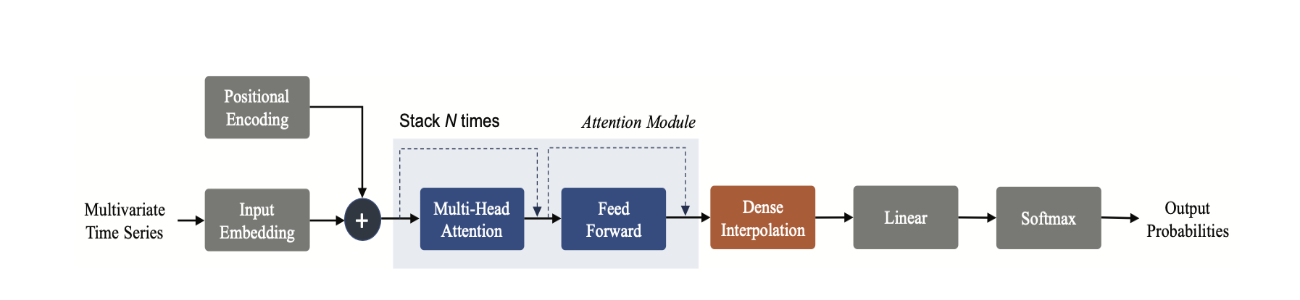

In [ ]:
# @title
# no code is required for this section
'''
if you want to use an image outside this notebook for explanaition,
you can upload it to your google drive and show it with OpenCV or matplotlib
'''
# mount this notebook to your google drive
# drive.mount('/content/gdrive')
# from google.colab.patches import cv2_imshow

# define dirs to workspace and data
img_dir = '/content/drive/MyDrive/BD4h_project_draft/Images/Model_Architecture.png'

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(img_dir)

# Define the desired width and height
new_width = 1300  # Adjust as needed
new_height = 300  # Adjust as needed

# Resize the image
resized_img = cv2.resize(img, (new_width, new_height))

# Display the resized image
cv2_imshow(resized_img)


**Figure 2: Provides an overview of the proposed model architecture for clinical prediction tasks. In comparison to the state-of-the-art approaches, it does not utilize any recurrence or convolutions for sequence modeling rather it utilizes a simple self-attention mechanism combined with a dense interpolation strategy to enable sequence modeling. The attention module comprises of N identical layers, which in turn contain the attention mechanism and a feed-forward sub-layer, along with residue connections.**


The details of each component in the model architecture is given below:

#### **Input Embedding:**

In our architecture, the initial step involves generating an embedding based on the R measurements at each time step t. This embedding captures dependencies among different variables without considering temporal information. It's similar to the input embedding process in many NLP architectures, where words in a sentence are transformed into a high-dimensional vector space to aid sequence modeling. We then use a 1D convolutional layer to produce d-dimensional embeddings (where d > R) for each t. The convolution filter coefficients, denoted as $w ∈ R^{T×h}$ (with h representing the kernel size), are applied to obtain the input embedding: $w · x_{i:i+h−1}$ for the measurement position i.



#### **Positional Encoding:**

Given our architecture's lack of recurrence, incorporating information regarding the sequence's order is important. To address this, we integrate details about the relative or absolute positions of time-steps in the sequence through positional encodings. These encodings are added to the input embeddings of the sequence. During both training and prediction, time step t is mapped to the same randomized lookup table. Subsequently, the d-dimensional positional embedding is added to the input embedding, maintaining the same dimensionality. The approach we have outlined proves highly effective across all our tasks.


#### **Attention Module:**

Our SAnD architecture uses restricted self-attention, considering information only from earlier positions in the sequence being analyzed. The range of dependency considered varies depending on the task; for instance, phenotyping tasks require a longer-range dependency compared to mortality prediction.


The attention function can be defined as mapping a query q and a set of key-value pairs ${k,v}$ to an output o. For each position t, the attention weighting is computed as the inner product between $q_t$ and keys at every other position in the sequence (within the restricted set)


$$\{k_{t'}\}^{t-1}_{t' = t - r}$$



here r is the mask size. Using these attention weights, we compute o as weighted combination of the value vectors $\{v_{t'}\}^{t-1}_{t' = t - r}$ and pass o through a feed-forward network to obtain the vector representation for t. Mathematically, attention can be written as:

    
$$Attention(Q, K, V) = softmax( \frac{QK^T}{\sqrt(d)}) V $$


Q, K, V are the matrices formed by query, key
and value vectors and d is the dimension of the key vectors. Since only self attention is utilized, Q,K,V all correspond to input embeddings of the sequence (with position encoding). The sequence is masked to specify how far in the past attention models can look in order to obtain the representation for each position.

A graph structure is created for the sequence where edges represent temporal dependencies. Multiple attention graphs are generated which can be interpreted to encode different types of edges providing information on different types of dependencies. Multi-head attention with 8 heads is used to create multiple attention graphs and the resulting weighted representations are concatenated and linearly projected to obtain the final representation.

1D convolutional sub-layers with kernel size 1, similar to input embedding, are the second component within the attention module.  Two of these 1D convolutional sub-layers with ReLU (rectified linear unit) activation are used in between. These sub-layers, with ReLU activation and residue connections, contribute to the model's internal architecture.

For the prediction task, representations obtained at the final attention module are utilized since the attention module is stacked N times. Instead of making predictions at each time step, a concise representation for the entire sequence is created using a dense interpolated embedding scheme, encoding partial temporal ordering.

#### **Dense Interpolation for Encoding Order:**

To create a unified representation for a sequence while preserving its order, a straightforward approach is to concatenate embeddings at each time step. However, this can result in a high-dimensional representation, which may not be suitable for learning and inference. Instead, a dense interpolation algorithm inspired by language modeling is used.


**Interpolation Algorithm Pseudocode**



```
Input : Steps t of the time series and length of the sequence T, embeddings at step t as st, factor M.

Output: Dense interpolated vector representation u.

for t = 1 to T do

  s = M ∗ t/T


  for m = 1 to M do

    w = pow(1 − abs(s − m)/M, 2)

    $u_m$ = $u_m$ + w ∗ $s_t$


  end

end
```



Dense interpolated embeddings, together with positional encoding, create a concise representation that effectively captures temporal structure necessary for challenging clinical prediction tasks.

The process of dense interpolation involves determining the contribution of each time step's hidden representation to the final vector representation. This is achieved by computing weights, denoted as w, based on the relative position of each time step in the final representation. These weights are visualized in the following Figure 3 for an example with T = 5 and M = 3, where darker edges represent larger weights indicating higher influence.

Dense interpolation is efficiently implemented by caching weights into a matrix $W ∈ R^{T × M}$ and performing matrix multiplication: $U = S × W$, where S = $[s_1, ..., s_T]$. Finally, the final representation u is obtained by stacking columns of U.

Figure 3: Shows dense interpolation module, for an example when T = 5 and M = 3



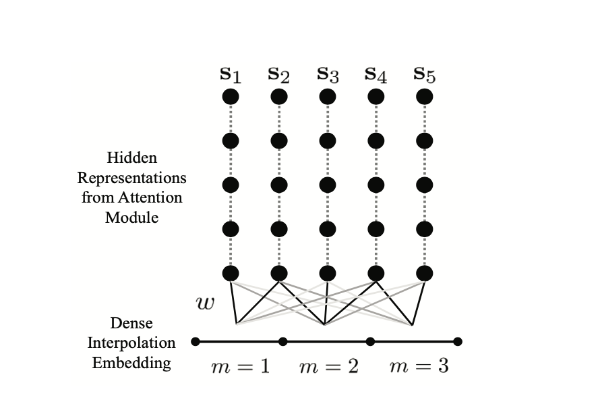

In [ ]:
# @title
# no code is required for this section
'''
if you want to use an image outside this notebook for explanaition,
you can upload it to your google drive and show it with OpenCV or matplotlib
'''
# mount this notebook to your google drive
# drive.mount('/content/gdrive')
# from google.colab.patches import cv2_imshow


# import  packages you need
import numpy as np
from google.colab import drive


# define dirs to workspace and data
img_dir = '/content/drive/MyDrive/BD4h_project_draft/Images/Dense_Interpolation.png'

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(img_dir)

# Define the desired width and height
new_width = 600  # Adjust as needed
new_height = 400  # Adjust as needed

# Resize the image
resized_img = cv2.resize(img, (new_width, new_height))

# Display the resized image
cv2_imshow(resized_img)



 #### **Regularization**

We also incorporate some regularization techniques during the training stage:

1. Firstly, dropout is applied to the output of each sub-layer within the attention module before adding residual connections, and then the outputs are normalized.

2. Additionally, an extra dropout layer is included after incorporating positional encoding into the input embeddings.

3. Attention dropout is also performed after computing the self-attention weights.


#### **Linear Layer and Loss**


After a single vector representation is obtained from the dense interpolation, a linear layer is utilized to obtain the logits. The choice of the final loss function depends on the specific task:

- For binary classification problems, a softmax layer is used along with the binary cross-entropy loss function, which is defined as:

  $$ -(y \cdot \log( \hat{y} )) + (1 - y) \cdot \log(1 - \hat{y}) $$

  where $y$ and  $\hat{y}$ represent the true and predicted labels, respectively.

- For multi-label classification tasks, a sigmoid layer is employed. The corresponding loss function is a sum of binary cross-entropy terms over each label, where \( K \) denotes the total number of labels in the dataset:

  $$ \frac{1}{K} \sum_{k=1}^{K} \left[ -(y_k \cdot \log(\hat{y}_k) + (1 - y_k) \cdot \log(1 - \hat{y}_k)) \right] $$

### **Model Specification**

For each of the clinical tasks following is our model specifications (input size, sequence length, output classes, number of heads etc):

**In hospital Mortality:**

```
Input features = 76
Sequence length = 30
Number of heads = 8
Interpolation factor = 12
Number of output classes = 2
Number of layers = 4
Output Layer = Softmax
Number of Epochs = 20
Learning Rate = 0.0005
Drop out = 0.3
```

**Decompensation:**



```
Input features = 76
Sequence length = 1044
Number of heads = 8
Interpolation factor = 10
Number of output classes = 2
Number of layers = 1
Output Layer = Softmax
Number of Epochs = 20
Learning Rate = 0.001
Drop out = 0.3

```


**Length of Stay:**


```
Input features = 76
Sequence length = 1062
Number of heads = 8
Interpolation factor = 12
Number of output classes = 10
Number of layers = 3
Output Layer = Sigmoid
Number of Epochs = 20
Learning Rate = 0.001
Drop out = 0.3
```


**Phenotyping:**



```
Input features = 76
Sequence length = 1063
Number of heads = 8
Interpolation factor = 120
Number of output classes = 25
Number of layers = 2
Output Layer = Sigmoid
Number of Epochs = 20
Learning Rate = 0.0005
Drop out = 0.4
```



### Importing Libraries

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import argparse
import os
import imp
import re
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

from readers import InHospitalMortalityReader, DecompensationReader, LengthOfStayReader, PhenotypingReader, MultitaskReader
from preprocessing import Discretizer, Normalizer
import common_utils

from model import SAnD
from trainer import NeuralNetworkClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import json


### In Hospital Mortality



In [ ]:
test_loader = torch.load('/content/drive/MyDrive/BD4h_project_draft/data/in-hospital-mortality/test_dataset_ihm.pth')

in_feature = 76
seq_len = 30
n_heads = 8
factor = 12
num_class = 2
num_layers = 4

clf = NeuralNetworkClassifier(
    SAnD(in_feature, seq_len, n_heads, factor,
         num_class, num_layers, d_model=24 ,dropout_rate = 0.3),
    nn.CrossEntropyLoss(),
    optim.Adam, optimizer_config={"lr": 5e-4,
                                  "betas": (0.9, 0.98),
                                  "eps": 10e-08,
                                  "weight_decay": 1e-20}
)


# reloading the and evaluate with loaded models make sure to change the path
clf.restore_from_file('/content/drive/MyDrive/BD4h_project_draft/models/IHM/model_params-epochs_20-Thu_Apr_18_09:34:02_2024.pth')

with open('/content/drive/MyDrive/BD4h_project_draft/models/IHM/ihm_results.json', 'r') as fp:
    results_dict_ihm = json.load(fp)

clf.evaluate(test_loader, LOS = False)


Evaluating: 100%|██████████| 3236/3236 [00:00<00:00, 3399.44it/s]

Evaluation finished. Accuracy: 0.8847
All Metrics:  {'auroc': 0.5361615282059881, 'auprc': 0.33721281888180304, 'minpse': 0.12434268252248173}


(0.884734239802225,
 {'auroc': 0.5361615282059881,
  'auprc': 0.33721281888180304,
  'minpse': 0.12434268252248173})

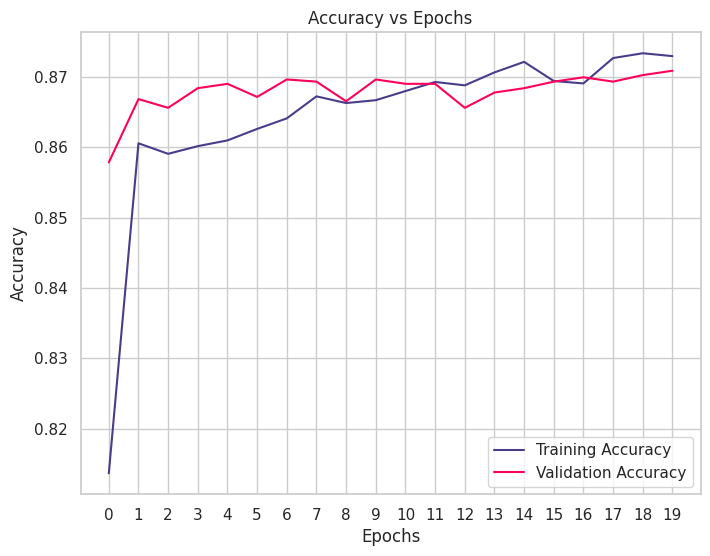

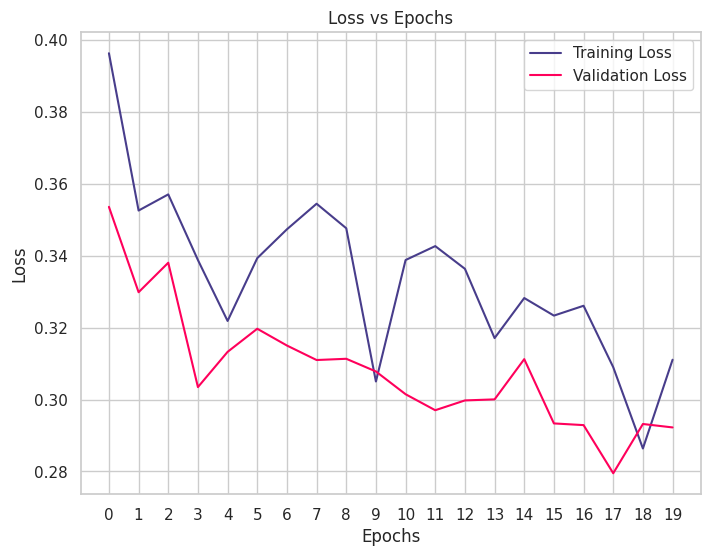

In [ ]:
epochs = list(results_dict_ihm['train'][0].keys())
train_acc = list(results_dict_ihm['train'][0].values())
val_acc = list(results_dict_ihm['val'][0].values())
train_loss = list(results_dict_ihm['train'][1].values())
val_loss = list(results_dict_ihm['val'][1].values())

color_palette = ['darkslateblue', '#FF005B']
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc, label='Training Accuracy', color=color_palette[0])
plt.plot(epochs, val_acc, label='Validation Accuracy', color=color_palette[1])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', color=color_palette[0])
plt.plot(epochs, val_loss, label='Validation Loss', color=color_palette[1])
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Decompensation

In [ ]:
test_loader = torch.load('/content/drive/MyDrive/BD4h_project_draft/data/decompensation_demo/test_dataset_decp.pth')


in_feature = 76
seq_len = 1044
n_heads = 8
factor = 10
num_class = 2
num_layers = 1

clf = NeuralNetworkClassifier(
    SAnD(in_feature, seq_len, n_heads, factor,
         num_class, num_layers, d_model=24 ,dropout_rate = 0.3),
    nn.CrossEntropyLoss(),
    optim.Adam, optimizer_config={"lr": 1e-3,
                                  "betas": (0.9, 0.98),
                                  "eps": 10e-08,
                                  "weight_decay": 1e-20}
)

clf.restore_from_file('/content/drive/MyDrive/BD4h_project_draft/models/Decompensation/model_params-epochs_20-Thu_Apr_18_16:04:28_2024.pth')

with open('/content/drive/MyDrive/BD4h_project_draft/models/Decompensation/decomp_results.json', 'r') as fp:
    results_dict_decomp = json.load(fp)

clf.evaluate(test_loader, LOS = False)


Evaluating: 100%|██████████| 1874/1874 [00:51<00:00, 36.37it/s]

Evaluation finished. Accuracy: 0.9082
All Metrics:  {'auroc': 0.6455681678923043, 'auprc': 0.35859917126685414, 'minpse': 0.28994005994005995}


(0.9082177161152615,
 {'auroc': 0.6455681678923043,
  'auprc': 0.35859917126685414,
  'minpse': 0.28994005994005995})

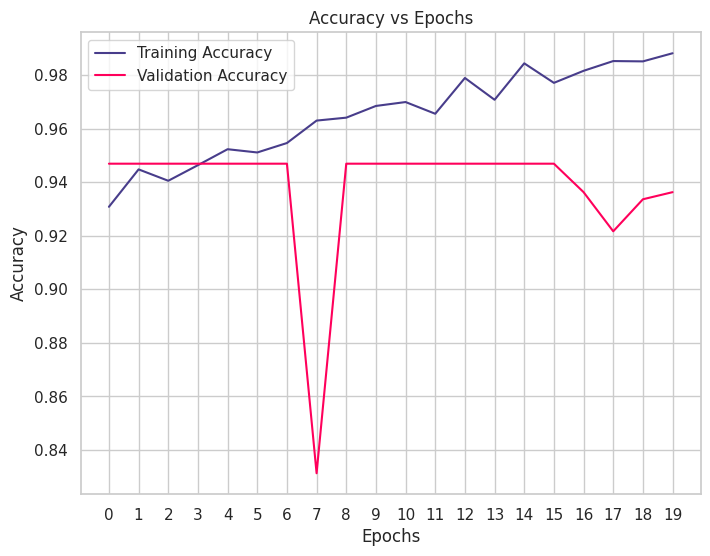

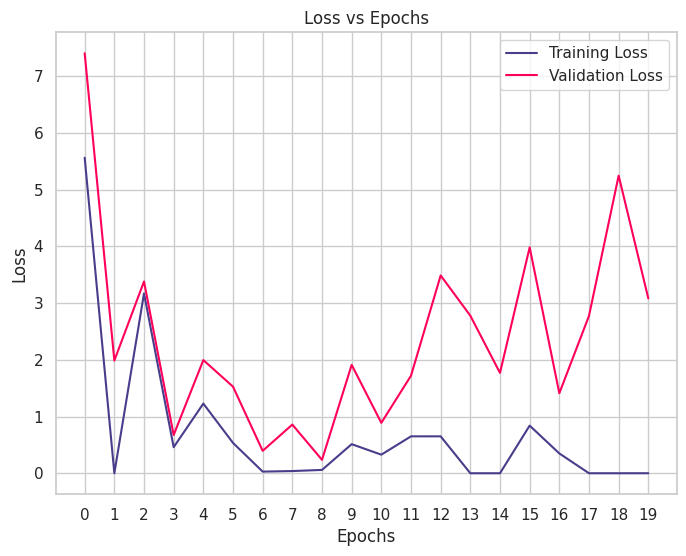

In [ ]:
epochs = list(results_dict_decomp['train'][0].keys())
train_acc = list(results_dict_decomp['train'][0].values())
val_acc = list(results_dict_decomp['val'][0].values())
train_loss = list(results_dict_decomp['train'][1].values())
val_loss = list(results_dict_decomp['val'][1].values())

color_palette = ['darkslateblue', '#FF005B']
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc, label='Training Accuracy', color=color_palette[0])
plt.plot(epochs, val_acc, label='Validation Accuracy', color=color_palette[1])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', color=color_palette[0])
plt.plot(epochs, val_loss, label='Validation Loss', color=color_palette[1])
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Length of Stay

In [ ]:
test_loader = torch.load('/content/drive/MyDrive/BD4h_project_draft/data/length-of-stay_demo/test_dataset_los.pth')
in_feature = 76
seq_len = 1062
n_heads = 8
factor = 12
num_class = 10
num_layers = 3

clf = NeuralNetworkClassifier(
    SAnD(in_feature, seq_len, n_heads, factor,
         num_class, num_layers, d_model=24 ,dropout_rate = 0.3),
    nn.CrossEntropyLoss(),
    optim.Adam, optimizer_config={"lr": 1e-3,
                                  "betas": (0.9, 0.98),
                                  "eps": 10e-08,
                                  "weight_decay": 1e-20}
)

clf.restore_from_file('/content/drive/MyDrive/BD4h_project_draft/models/LOS/model_params-epochs_20-Thu_Apr_18_18:54:37_2024.pth')

with open('/content/drive/MyDrive/BD4h_project_draft/models/LOS/los_results.json', 'r') as fp:
    results_dict_los = json.load(fp)

clf.evaluate(test_loader, LOS = True)

Evaluating: 100%|██████████| 150/150 [00:12<00:00, 11.79it/s]

Evaluation finished. Accuracy: 0.3667
All Metrics:  {'kappa': -0.093983092988563, 'mse': 34.653333333333336, 'mape': 54.64788732394366}


(0.36666666666666664,
 {'kappa': -0.093983092988563,
  'mse': 34.653333333333336,
  'mape': 54.64788732394366})

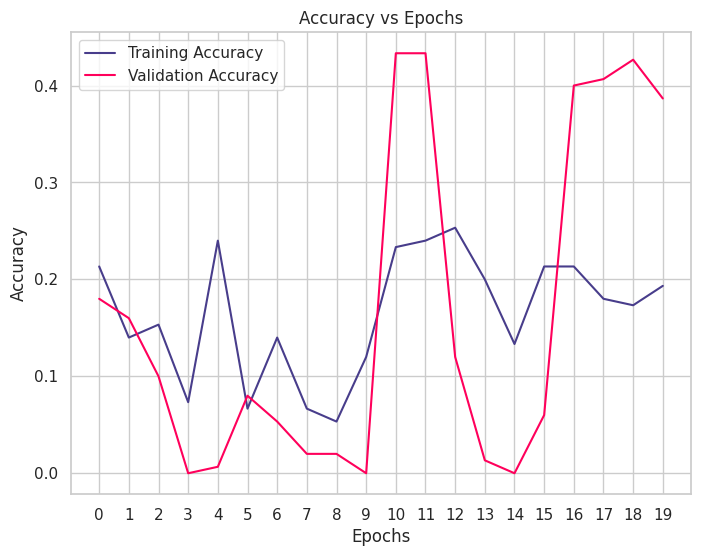

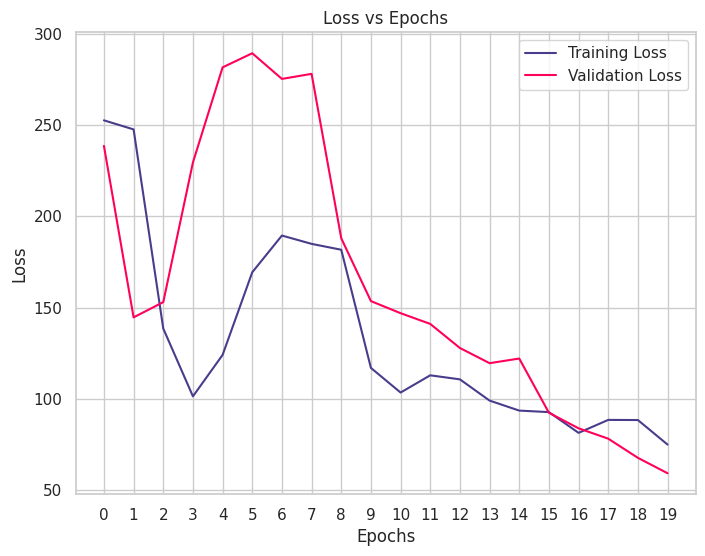

In [ ]:
epochs = list(results_dict_los['train'][0].keys())
train_acc = list(results_dict_los['train'][0].values())
val_acc = list(results_dict_los['val'][0].values())
train_loss = list(results_dict_los['train'][1].values())
val_loss = list(results_dict_los['val'][1].values())

color_palette = ['darkslateblue', '#FF005B']
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc, label='Training Accuracy', color=color_palette[0])
plt.plot(epochs, val_acc, label='Validation Accuracy', color=color_palette[1])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', color=color_palette[0])
plt.plot(epochs, val_loss, label='Validation Loss', color=color_palette[1])
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Phenotyping

In [ ]:
test_loader = torch.load('/content/drive/MyDrive/BD4h_project_draft/data/phenotyping_demo/test_dataset_pheno.pth')
in_feature = 76
seq_len = 1063
n_heads = 8
factor = 120
num_class = 25
num_layers = 2

clf = NeuralNetworkClassifier(
    SAnD(in_feature, seq_len, n_heads, factor,
         num_class, num_layers, d_model=96 ,dropout_rate = 0.4),
    nn.CrossEntropyLoss(),
    optim.Adam, optimizer_config={"lr": 5e-4,
                                  "betas": (0.9, 0.98),
                                  "eps": 10e-08,
                                  "weight_decay": 1e-20}
)

clf.restore_from_file('/content/drive/MyDrive/BD4h_project_draft/models/Phenotyping/model_params-epochs_20-Fri_Apr_19_11:36:13_2024.pth')

with open('/content/drive/MyDrive/BD4h_project_draft/models/Phenotyping/ph_results.json', 'r') as fp:
    results_dict_ph = json.load(fp)

clf.evaluate_phenotype(test_loader)

Evaluating: 100%|██████████| 500/500 [00:32<00:00, 15.60it/s]

Evaluation finished. Accuracy: 0.2200
All Metrics:  {'ave_auc_micro': 0.5396192414128926, 'ave_auc_macro': 0.5396192414128926, 'ave_auc_weighted': 0.5396192414128926}


({'overall_accuracy': 0.22004849091172218},
 {'ave_auc_micro': 0.5396192414128926,
  'ave_auc_macro': 0.5396192414128926,
  'ave_auc_weighted': 0.5396192414128926})

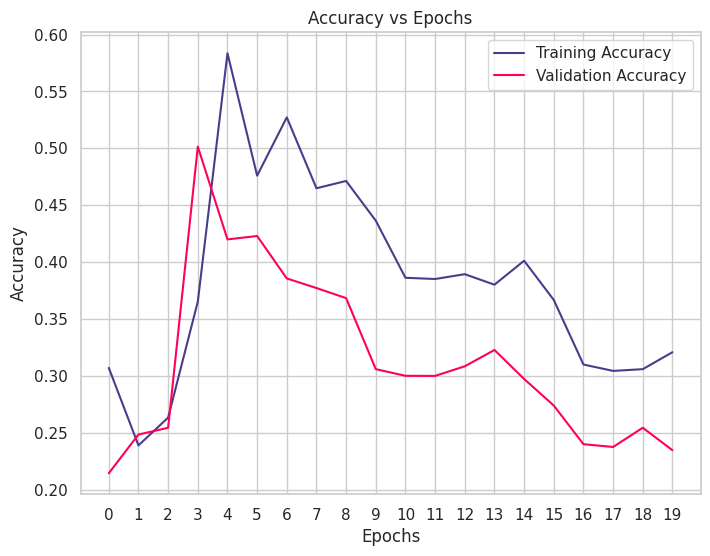

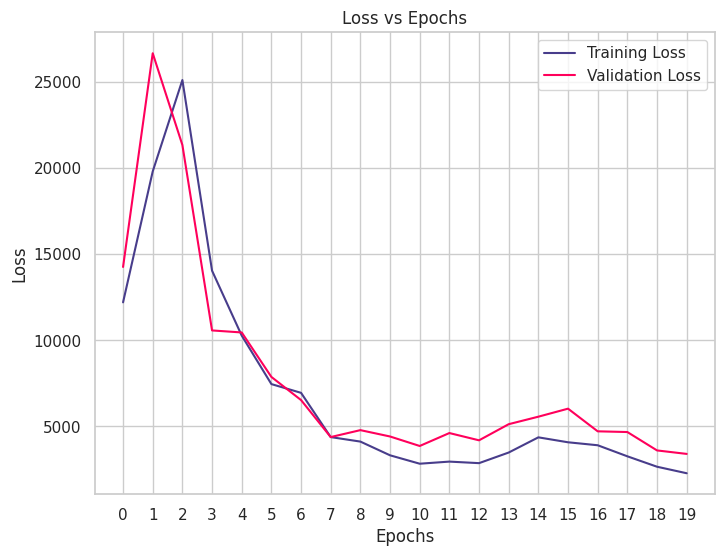

In [ ]:
epochs = list(results_dict_ph['train'][0].keys())
train_acc = list(results_dict_ph['train'][0].values())
val_acc = list(results_dict_ph['val'][0].values())
train_loss = list(results_dict_ph['train'][1].values())
val_loss = list(results_dict_ph['val'][1].values())

color_palette = ['darkslateblue', '#FF005B']
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc, label='Training Accuracy', color=color_palette[0])
plt.plot(epochs, val_acc, label='Validation Accuracy', color=color_palette[1])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', color=color_palette[0])
plt.plot(epochs, val_loss, label='Validation Loss', color=color_palette[1])
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Results**

Our model on MIMIC's demo data gives the following results for 20 epochs.

### **Evaluation Metrics for our Model:**

| Task               | AUROC | AUPRC | min(Se, P+) | Accuracy | Kappa | MSE     | MAPE    | Micro AUC | Macro AUC | Weighted AUC |
|--------------------|-------|-------|--------|----------|-------|---------|---------|-------------|-------------|----------------|
| In-Hospital Mortality | 0.53   | 0.33 | 0.12  | 0.88   | -     | -       | -       | -           | -           | -              |
| Decompensation        | 0.65   | 0.37 | 0.282  | 0.91   | -     | -       | -       | -           | -           | -              |
| Length of Stay       | -     | -     | -      | 0.37   | -0.09   | 34.6| 54.64 | -           | -           | -              |
| Phenotyping          | -     | -     | -      | 0.22   | -     | -       | -       | 0.538      | 0.538      | 0.538         |

From this table it seems the performance of the model in terms of AUROC and Accuracy is adequate for in hospital mortality and decompensation tasks. For length of stay even though our MSE is small our MAPE is quite high and Kappa is 0. Similarly for phenotyping in terms of Micro AUC and Macro AUC the perfromance seems suitable as well.  

Note: Here for Phenotyping Micro and Macro AUC are coming out to be similar because the data has perfectally balanced classes.


### **Loss of our Model:**



Even though from the loss curves the loss seems small for in-hospital mortality and length of stay in general, it's not fully representative of the performance of the model since we are running the model on a small dataset.
The loss though decreases as the number of epochs increase and this behavior is consistent across all tasks. The accuracy however tends to drop with increasing number of epochs which shows signs of overfitting and that's obvious since the size of the data is small.
The same is the case for evaluation metrics they don't seem to fully represent the performance since we haven't run the model on the complete dataset and on large number of epochs.



### **Evaluation Metrics as reported in the paper:**

For the complete dataset for the SAnD the paper showed following results:

| Task               | AUROC | AUPRC | min(Se, P+) | Accuracy | Kappa | MSE     | MAPE    | Micro AUC | Macro AUC | Weighted AUC |
|--------------------|-------|-------|--------|----------|-------|---------|---------|-------------|-------------|----------------|
| In-Hospital Mortality | 0.857   | 0.518 | 0.5  | -   | -     | -       | -       | -           | -           | -              |
| Decompensation        | 0.895   | 0.316 | 0.354  | -   | -     | -       | -       | -           | -           | -              |
| Length of Stay       | -     | -     | -      | -   | 0.429  | 40373| 167.3 | -           | -           | -              |
| Phenotyping          | -     | -     | -      | -   | -     | -       | -       | 0.816      | 0.766      | 0.754         |



### **Description of Metrics:**

1. Area under Receiver Operator Curve (AUROC),
2. Area under Precision-Recall Curve (AUPRC)
3. Minimum of precision and sensitivity (Min(Se,P+))
4. Mean squared error (MSE)  
5. Mean absolute percentage error (MAPE)
6. Kappa: Measures inter-agreement between true and predicted labels using the Cohen’s linear weighted kappa metric.
7. Weighted Area under the curve (Weighted AUC)


### **Choice of metrics for each task:**

The reason for choice of the metrics is stated below:
#### **In hospital Mortality:**

AUC-ROC is one of the most commonly reported metric in mortality prediction research. Area under the precision-recall curve (AUC-PR) metric has also been used since it can be more informative when dealing with highly skewed datasets

#### **Decompensation:**

For decompensation same metrics as in hospital mortality are used (i.e., AUC-ROC and AUC-PR) reason being because per-instance accuracy is of relevance  in this task (as opposed to per patient). Therefore, the overall performance is computed as the micro-average over all predictions regardless of the patient.

#### **Length of Stay:**

For length of stay we have ten buckets as classes,
which makes length-of-stay prediction an ordinal multiclass classification
problem. In order to gauge prediction accuracy for this task, we use Cohen’s linear weighted kappa which measures correlation between ordered items.

Additionally, we assign the mean length of stay from each bin to the samples assigned to that class, and use conventional metrics such as mean squared error (MSE) and mean absolute percentage error (MAPE).


#### **Phenotyping:**


Phenotyping is formulated as a multi-label classification problem since a patient can have more than one disease hence macro and micro-averaged AUC-ROC is used since it has been used by other authors for similar tasks historically.

## Model comparison

The authors in our paper also referred to results from LSTM and Logistic Regression as benchmarks from the secondary paper for all tasks. The reported results for Logistic Regression and LSTM are below:

**Logistic Regression**

| Task               | AUROC | AUPRC | MinPSE | Accuracy | Kappa | MSE     | MAPE    | Micro AUC | Macro AUC | Weighted AUC |
|--------------------|-------|-------|--------|----------|-------|---------|---------|-------------|-------------|----------------|
| In-Hospital Mortality | 0.845   | 0.472 | 0.469  | -   | -     | -       | -       | -           | -           | -              |
| Decompensation        | 0.87   | 0.2132 | 0.269  | -   | -     | -       | -       | -           | -           | -              |
| Length of Stay       | -     | -     | -      | -   | 0.402  | 63385| 573.5 | -           | -           | -              |
| Phenotyping          | -     | -     | -      | -   | -     | -       | -       | 0.801      | 0.741      | 0.732         |


**LSTM**

| Task               | AUROC | AUPRC | MinPSE | Accuracy | Kappa | MSE     | MAPE    | Micro AUC | Macro AUC | Weighted AUC |
|--------------------|-------|-------|--------|----------|-------|---------|---------|-------------|-------------|----------------|
| In-Hospital Mortality | 0.854   | 0.516 | 0.491  | -   | -     | -       | -       | -           | -           | -              |
| Decompensation        | 0.895   | 0.298 | 0.344  | -   | -     | -       | -       | -           | -           | -              |
| Length of Stay       | -     | -     | -      | -   | 0.427  | 42165| 235.9 | -           | -           | -              |
| Phenotyping          | -     | -     | -      | -   | -     | -       | -       | 0.821      | 0.77      | 0.757         |


As repored in the paper the SAnD architecture as we can see provided comparable or better results compared to the benchmark results.

# Discussion

For each of the tasks SAnD showed optimal performance for the following model specifications as per the paper:


**In Hospital Mortality**
```
Number of Layers = 4
Interpolation factor = 12
learning rate = 0.0005
dropout = 0.3
```

**Decompensation**
```
Number of Layers = 1
Interpolation factor = 10
learning rate = 0.001
```

**Length of Stay**
```
Number of Layers = 3
Interpolation factor = 12
```

**Phenotyping**
```
Number of Layers = 2
Interpolation factor = 120
learning rate = 0.0005
dropout = 0.4
```

The complete MIMIC III data even after processing was extremely large in size. Our model couldn't run on colab since it kept running out of memory. We purhcased higher RAM on colab to run the model but the additional memory wasn't sufficient. We also tried different subsets of the full data but even those subsets ran into the same issue. The paper did not specify system requirements nor the provided GitHub code had any instructions on how to run the model on MIMIC-III data or any BigData of similar size and nature.
Hence for the final delivery we ran the model on the MIMIC III demo data for larger number of epochs with similar parameter configuration as in our paper.

 We can clearly see the results in terms are not great. However, we have been successful in replicating the code and running it for all the single clinical prediction tasks. It is evident that the code is reproducible. We were not able to get exactly the same results as reported in the paper since we ran the model just on a subset of the data. However, we used the hyperparameters and model specifications as provided in the paper and we ran our model for larger number of epochs (20) and we do see an improvement in our results but they are not the same as in the paper. We have pretrained the models and then load the pretrained models to showcase our model performance.

The challenging part in the replication was the data processing pipeline since the code base of our original paper just provides the model implementation but didn't provide any instructions on how the data would be processed and inputted into the models so we had to rely on another paper for the whole data processing part which was quite cumbersome. By using the data pipeline from the other paper even though we were able to get the preprocessed data the next challenge was to adapt and modify this data in a way such that it could be consumed by our SAnD model for which we had to make modifications not only in the processed data but we also to make modifications to the model implementation itself specially in the model fitting and evaluating parts. Furthermore, there were some bugs in the model and some outdated libraries which we had to modify and update to make the model working. Secondly, the authors neither in our original paper nor in the secondary paper provided any instructions regarding system requirements or on how to optimized the code to run it on the complete MIMIC-III data which became a blocker in getting the exactly same or comparable results.

The good thing was the fact that the authors had provided proper references so we were able to navigate to the paper that did the data preprocessing and had run the baseline models (Logistic Regression and LSTM for the same clinical tasks) and they had also provided the code base which made it easier for us to use the data pipeline for our SAnD model. Our recommendation to the authors would be if they want others to be able to validate the efficiency of the models they should provide the code or at least the instructions on how to preprocess the data or how to use any other existing data pipelines. Furthermore, they should also specify system requirements and also provide instructions on how to execute the code on large datasets such as MIMIC-III.






# References


* Harutyunyan, H., Khachatrian, H., Kale, D.C., Steeg, G.V. and Galstyan, A. (2019b). Multitask learning and benchmarking with clinical time series data. Scientific Data, [online] 6(1), p.96. doi:https://doi.org/10.1038/s41597-019-0103-9.

* Harutyunyan, H. (2024). YerevaNN/mimic3-benchmarks. [online] GitHub. Available at: https://github.com/YerevaNN/mimic3-benchmarks/tree/master [Accessed 29 Mar. 2024].

* Johnson, A., Pollard, T. and Mark, R. (2016). MIMIC-III Clinical Database. [online] Physionet.org. Available at: https://physionet.org/content/mimiciii/1.4/.


* Song, H., Rajan, D., Thiagarajan, J. and Spanias, A. (2018). Attend and Diagnose: Clinical Time Series Analysis Using Attention Models. Proceedings of the AAAI Conference on Artificial Intelligence, 32(1). doi:https://doi.org/10.1609/aaai.v32i1.11635.


* Kawashima, H. (2024a). khirotaka/SAnD. [online] GitHub. Available at: https://github.com/khirotaka/SAnD [Accessed 29 Mar. 2024].